In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# Taken from https://jwalton.info/Embed-Publication-Matplotlib-Latex/
tex_width = 345

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [3]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [4]:
df = pd.concat(
    [pd.read_csv("results_Hopper-v3_spaces_2.csv")] #, pd.read_csv("results_Hopper-v3_spaces_2.csv")]
)
df.head()

,Name,Tags,Runtime,Created,Notes,alpha,hidden_size,realizable,value_init_gain,learn_scale,param_diff,test/loc-diff,test/loss,test/models[0]/loc-norm,test/models[0]/scale-norm,test/nll,test/nll_weight,test/scale-diff,test/scale-norm,test/vae
0,eager-pyramid-1513,exp2,93,2020-10-13T22:47:03.000Z,-,0.001,1024,False,1,True,NaN,3.375539,0.097323,3.381839,11.206497,1.721609e+01,0.001,3.120630,11.206497,0.080187
1,clear-fire-1512,exp2,146,2020-10-13T22:46:06.000Z,-,1.000,1024,False,1,True,NaN,1.837533,15.015356,1.840050,10.274226,1.501536e+01,1.000,1.584423,10.274226,0.044113
2,winter-dragon-1511,exp2,113,2020-10-13T22:45:57.000Z,-,0.000,1024,False,1,True,NaN,5.256580,0.042094,5.253757,0.438619,1.097223e+16,0.000,9.260229,0.438619,0.042094
3,scarlet-surf-1510,exp2,109,2020-10-13T22:45:33.000Z,-,0.001,512,False,1,True,NaN,1.888022,0.049759,1.880621,9.908449,1.530539e+01,0.001,1.715000,9.908449,0.034488
4,confused-snowflake-1509,exp2,116,2020-10-13T22:44:56.000Z,-,1.000,512,False,1,True,NaN,1.672332,14.777835,1.661789,9.903311,1.477783e+01,1.000,1.162175,9.903311,0.035934


In [5]:
df.columns

Index(['Name', 'Tags', 'Runtime', 'Created', 'Notes', 'alpha', 'hidden_size',
       'realizable', 'value_init_gain', 'learn_scale', 'param_diff',
       'test/loc-diff', 'test/loss', 'test/models[0]/loc-norm',
       'test/models[0]/scale-norm', 'test/nll', 'test/nll_weight',
       'test/scale-diff', 'test/scale-norm', 'test/vae'],
      dtype='object')

In [6]:
def model_learning_cats(series):
    dmap = {1.0: "mle", 0.0: "vaml", 0.001: "reg-vaml"}
    return series.map(dmap).astype(str)

df["model learning"] = model_learning_cats(df["alpha"])
df.head()

,Name,Tags,Runtime,Created,Notes,alpha,hidden_size,realizable,value_init_gain,learn_scale,...,test/loc-diff,test/loss,test/models[0]/loc-norm,test/models[0]/scale-norm,test/nll,test/nll_weight,test/scale-diff,test/scale-norm,test/vae,model learning
0,eager-pyramid-1513,exp2,93,2020-10-13T22:47:03.000Z,-,0.001,1024,False,1,True,...,3.375539,0.097323,3.381839,11.206497,1.721609e+01,0.001,3.120630,11.206497,0.080187,reg-vaml
1,clear-fire-1512,exp2,146,2020-10-13T22:46:06.000Z,-,1.000,1024,False,1,True,...,1.837533,15.015356,1.840050,10.274226,1.501536e+01,1.000,1.584423,10.274226,0.044113,mle
2,winter-dragon-1511,exp2,113,2020-10-13T22:45:57.000Z,-,0.000,1024,False,1,True,...,5.256580,0.042094,5.253757,0.438619,1.097223e+16,0.000,9.260229,0.438619,0.042094,vaml
3,scarlet-surf-1510,exp2,109,2020-10-13T22:45:33.000Z,-,0.001,512,False,1,True,...,1.888022,0.049759,1.880621,9.908449,1.530539e+01,0.001,1.715000,9.908449,0.034488,reg-vaml
4,confused-snowflake-1509,exp2,116,2020-10-13T22:44:56.000Z,-,1.000,512,False,1,True,...,1.672332,14.777835,1.661789,9.903311,1.477783e+01,1.000,1.162175,9.903311,0.035934,mle


In [7]:
print(df[df["value_init_gain"] == 1.0]["test/vae"].mean())
print(df[df["value_init_gain"] == 2.0]["test/vae"].mean())

0.0372247322048578
nan


In [8]:
df = df[df["value_init_gain"] == 1.0]

In [9]:
# hue_order = list(map(str, [1.0, 0.0, 0.001]))
# df["alpha"] = df["alpha"].astype(str)
hue_order = "mle vaml reg-vaml".split()

In [10]:
def scatter_vae_vs_hsize(ax, data, **kwargs):
    sns.scatterplot(ax=ax, data=data, x="hidden_size", y="test/vae", hue="model learning", hue_order=hue_order, **kwargs)

In [11]:
def barplot_vae_vs_hsize(ax, data, **kwargs):
    sns.barplot(ax=ax, data=data, x="hidden_size", y="test/vae", hue="model learning", hue_order=hue_order, ci="sd", **kwargs)

In [12]:
import matplotlib.patches as mpatches

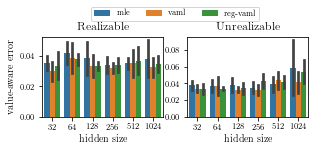

In [13]:
fig, axes = plt.subplots(1, 2, figsize=set_size(tex_width, subplots=(1, 2)))

ax = axes[0]
barplot_vae_vs_hsize(ax=ax, data=df[df["realizable"] == True])
ax.get_legend().remove()
ax.set_ylabel("value-aware error")
ax.set_xlabel("hidden size")
ax.set_title("Realizable")

ax = axes[1]
barplot_vae_vs_hsize(ax=ax, data=df[df["realizable"] == False])
ax.set_ylabel(None)
ax.set_xlabel("hidden size")
ax.set_title("Unrealizable")
ax.legend(loc="lower center", bbox_to_anchor=(-0.1, 1.15), ncol=7)
# ax.text(-6.4, 0.121, "alpha:") 

plt.savefig("experiment2_output.pdf", bbox_inches="tight")